In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy import *
from scipy import integrate

In [72]:
def Numerov(f, psi0, dh):

    psi = np.zeros(len(f))
    psi[0] = (1/(np.pi)**0.5)*np.exp(-R[-1])
    psi[1] = (1/(np.pi)**0.5)*np.exp(-(R[-1]-dh))
    
    h2 = dh**2
    h12 = h2/12.

    w0=psi0*(1-h12*f[0])
    w1=psi[1]*(1-h12*f[1])
    xi = psi[1]
    fi = f[1]
    for i in range(2,len(f)):
        w2 = 2*w1-w0+h2*fi*xi  
        fi = f[i] 
        xi = w2/(1-h12*fi)
        psi[i]=xi
        w0 = w1
        w1 = w2
    return psi

In [73]:
def fhyd(En, l, R):
    return l*(l+1.)/R**2-2./R-En

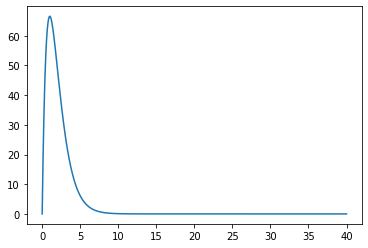

In [75]:
R = np.linspace(1e-7,40,10**6)
l=0
n=1
En=-1.0/n**2
f = fhyd(En,l,R[::-1])
psi = Numerov(f,0,R[1]-R[0])[::-1]
#norm = integrate.simps(psi**2,x=R)
#psi *= 1/sqrt(abs(norm))

from pylab import *
%matplotlib inline

plt.plot(R,psi)
plt.show()

40.0